In [47]:
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X.values]
        return np.array(predictions)

    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        accuracy = np.sum(predictions == y_test) / len(y_test)
        return accuracy

    def _predict(self, x):
        distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train.values]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train.iloc[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [6]:
datasets=load_breast_cancer()
X=datasets.data
y=datasets.target

In [13]:
datasets.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
df=pd.DataFrame(data=X,columns=datasets.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
df['target']=y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [17]:
df['target'].unique()

array([0, 1])

In [18]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

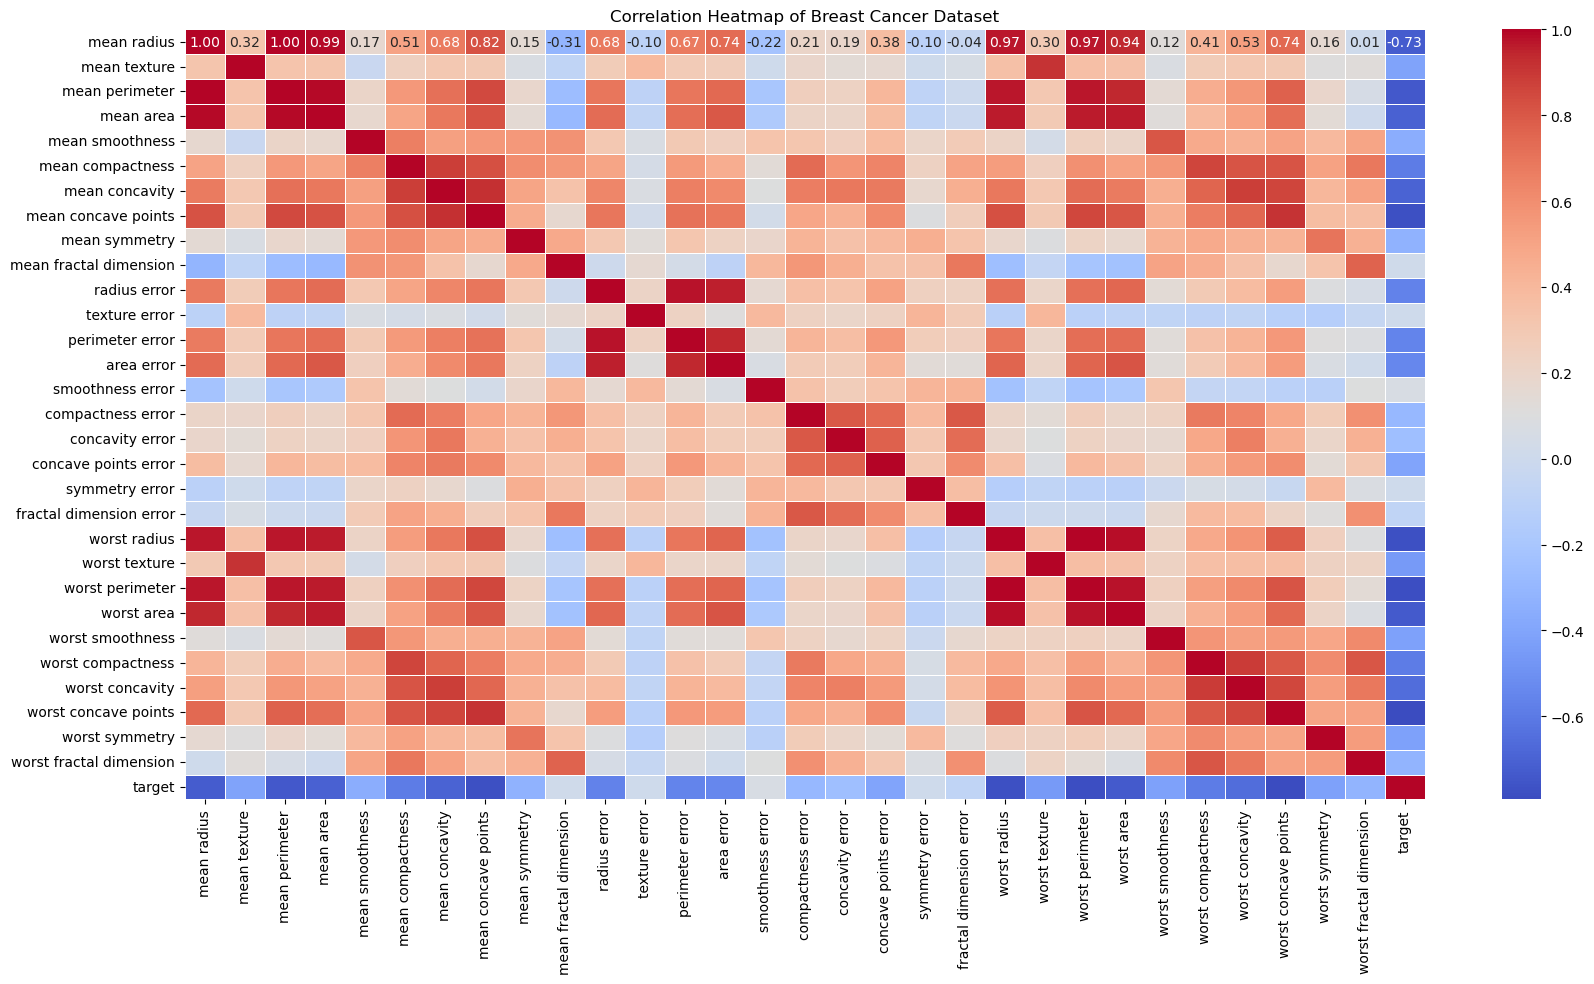

In [24]:

corr = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Breast Cancer Dataset')
plt.show()

In [27]:
new_df=df[['mean radius','mean texture','mean perimeter','mean area','worst radius','worst texture','worst perimeter','worst perimeter','target']]
new_df.head()

,mean radius,mean texture,mean perimeter,mean area,worst radius,worst texture,worst perimeter,worst perimeter,target
0,17.99,10.38,122.80,1001.0,25.38,17.33,184.60,184.60,0
1,20.57,17.77,132.90,1326.0,24.99,23.41,158.80,158.80,0
2,19.69,21.25,130.00,1203.0,23.57,25.53,152.50,152.50,0
3,11.42,20.38,77.58,386.1,14.91,26.50,98.87,98.87,0
4,20.29,14.34,135.10,1297.0,22.54,16.67,152.20,152.20,0


In [29]:
X=new_df.drop(columns='target')
X.head()

,mean radius,mean texture,mean perimeter,mean area,worst radius,worst texture,worst perimeter,worst perimeter
0,17.99,10.38,122.80,1001.0,25.38,17.33,184.60,184.60
1,20.57,17.77,132.90,1326.0,24.99,23.41,158.80,158.80
2,19.69,21.25,130.00,1203.0,23.57,25.53,152.50,152.50
3,11.42,20.38,77.58,386.1,14.91,26.50,98.87,98.87
4,20.29,14.34,135.10,1297.0,22.54,16.67,152.20,152.20


In [30]:
y=new_df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(len(X_train))
print(len(X_test))

455
114


In [36]:
model=KNN(k=10)
model.fit(X_train,y_train)

In [37]:
prediction= model.predict(X_test)

In [38]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9428571428571428
0.9122807017543859


In [39]:
X_test

,mean radius,mean texture,mean perimeter,mean area,worst radius,worst texture,worst perimeter,worst perimeter
421,14.690,13.98,98.22,656.1,16.46,18.34,114.10,114.10
47,13.170,18.66,85.98,534.6,15.67,27.95,102.80,102.80
292,12.950,16.02,83.14,513.7,13.74,19.93,88.81,88.81
186,18.310,18.58,118.60,1041.0,21.31,26.36,139.20,139.20
414,15.130,29.81,96.71,719.5,17.26,36.91,110.10,110.10
...,...,...,...,...,...,...,...,...
172,15.460,11.89,102.50,736.9,18.79,17.04,125.00,125.00
3,11.420,20.38,77.58,386.1,14.91,26.50,98.87,98.87
68,9.029,17.33,58.79,250.5,10.31,22.65,65.50,65.50
448,14.530,19.34,94.25,659.7,16.30,28.39,108.10,108.10


In [44]:
y_test

421    1
47     0
292    1
186    0
414    0
      ..
172    0
3      0
68     1
448    1
442    1
Name: target, Length: 114, dtype: int64

In [45]:
# Convert new data into a pandas DataFrame
new_data = pd.DataFrame([[12.950,16.02,83.14,513.7,13.74,19.93,88.81,88.81]])
prd=model.predict(new_data)

In [46]:
prd

array([1])

In [49]:
y_pred = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrix

array([[32, 10],
       [ 0, 72]])

[[32 10]
 [ 0 72]]


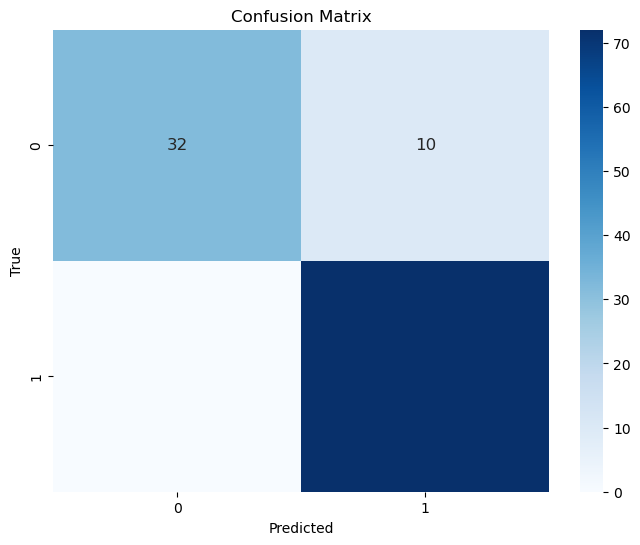

In [53]:
print(confusionMatrix)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        42
           1       0.88      1.00      0.94        72

    accuracy                           0.91       114
   macro avg       0.94      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114



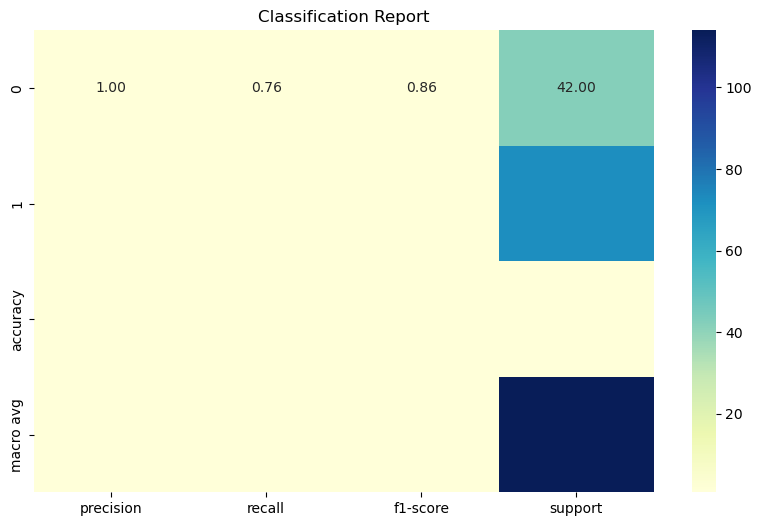

In [56]:

# Assuming y_test and y_pred are already defined
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.show()
